<h2>Trabalho Realizado Por:</h2>
<br>
Carlos Ferreira - a87953
<br>
Daniel Ribeiro - a87994

<h2>Exercício 2</h2>


a) Provar que não existe solução do problema, usando  Z3 em 
<br>
    

<b>i.Lógica Proposicional:</b>

<br>
A variável $x_{p,pl}$ determina se o pombo p está no poleiro pl
<br>
O número total de pombos será P e o número total de poleiros será Pl = P-1

<br>
Cada pombo p tem de estar em um poleiro pl:
$$
\forall_{p < P} \quad \bigvee_{pl=0}^{Pl-1} x_{p,pl}
$$


Cada poleiro apenas contém 1 pombo:
$$
\forall_{pl < Pl} \quad  ( \quad  \bigwedge_{p=0}^{P-1} x_{p,pl} \rightarrow  \bigwedge_{p'=p+1}^{P-1} \neg x_{p',pl}  \quad)
$$

In [1]:
from z3 import *
from timeit import timeit
import matplotlib.pyplot as plt

def pombos (N):
    
    s = Solver()
    o = 0
    r = {}
    
    if N > 0:
        
        for pombo in range (N):
            
            r [pombo] = {}
            o+=1
            for poleiro in range (N-1):
                
                r[pombo][poleiro] = Bool ("pombo " + str(pombo) + " esta no poleiro " + str(poleiro))
                o += 1
                    
        # N² - N + N ≈ O(N²)
        
        for pombo in range(N):
            o = o + N - 1
            s.add(Or([r[pombo][poleiro] for poleiro in range(N-1)])) # pombo tem que estar num poleiro
            
        # N² - N ≈ O(N²)
                
        for poleiro in range(N-1):
            for pombo in range(N):
                o = o + N - pombo + 1
                s.add(Implies(r[pombo][poleiro],And([Not(r[j][poleiro]) for j in range (pombo + 1,N)]))) # cada poleiro contem apenas 1 pombo
         # (N - 1) * N * N/2 = (N² - N) * N/2 = N³/2 - N²/2 ≈ O(N³)
        
        if s.check() == sat:
            m = s.model()
            print ("Possivel")
        else:
            print ("Nao possivel")
            print ("Nº de operações:" + str(o))
       
    else:
        
        print ("Valor de n tem de ser maior de 0")
    
    return o
    




In [2]:
#Vamos testar para os exemplos com o numero de pombos = 6 e numero de pombos = 8:

for i in range (10):
    pombos(i)    
    

Valor de n tem de ser maior de 0
Nao possivel
Nº de operações:1
Nao possivel
Nº de operações:11
Nao possivel
Nº de operações:33
Nao possivel
Nº de operações:70
Nao possivel
Nº de operações:125
Nao possivel
Nº de operações:201
Nao possivel
Nº de operações:301
Nao possivel
Nº de operações:428
Nao possivel
Nº de operações:585


<b>ii. Provar que não existe solução usando lógica inteira linear:</b>

Existem N pombos  e N-1 poleiros de pombos. Cada pombo ocupa totalmente um poleiro. 
Pretende-se alocar cada pombo a um poleiro próprio.
<br>
<br>
$$
\left\{
\begin{array}{l}
Pombos = N\\
Poleiros = N-1\\
0 \leq x_{pombo,poleiro} \leq 1 , \quad \text{onde ( $x_{pombo,poleiro}$ = 1) <=> pombo esta no poleiro}\\
\end{array}
\right.
$$
<br>
Como todos os pombos estão obrigatoriamente num poleiro:
<br>
$$
\sum_{pombo < N,poleiro < N - 1} x_{pombo,poleiro} = N
$$
<br>
Cada poleiro so pode ter 1 pombo ou nenhum:
<br>
$$
\forall_{poleiro < N - 1} \quad \sum_{pombo < N} x_{pombo,poleiro} \leq 1
$$



<br>


In [3]:
def pombos_inteiro_linear (N):
    
    o = 0
    if N > 0:
        
        X = {} # poleiro do pombo respetivo
        
        for pombo in range (N):
            X[pombo] = {}
            o+=1
            for poleiro in range (N - 1):
                X[pombo][poleiro] = Int ("pombo esta no poleiro " + str(poleiro))
                o+=1
                
        # N² - N + N ≈ O(N²)  

        s = Solver()
        
        # como todos os pombos têm que estar num poleiro o somatario tem que dar N

        s.add(Sum([X[p][pol] for p in range (N) for pol in range (N-1)]) == N) # N² - N ≈ O(N²) 
        o += N * (N-1)
        
        # cada poleiro pode ter 0 ou nehum 1 passaros
        
        for poleiro in range (N - 1) :
                s.add(Sum([X[pombo][poleiro] for pombo in range (N)]) <= 1)
                o += N

        # N² - N ≈ O(N²) 

        r = s.check()
    
        if r==sat :
            m = s.model()
            print("Possivel:")
        else: 
            print("Nao possivel")
            print ("Nº de operações:" + str(o))
    else:
        
        print ("Valor de n tem de ser maior de 0")
                
    return o

In [4]:
#Vamos testar alguns exemplos:

for i in range (10):
    pombos_inteiro_linear(i)    

    

Valor de n tem de ser maior de 0
Nao possivel
Nº de operações:1
Nao possivel
Nº de operações:8
Nao possivel
Nº de operações:21
Nao possivel
Nº de operações:40
Nao possivel
Nº de operações:65
Nao possivel
Nº de operações:96
Nao possivel
Nº de operações:133
Nao possivel
Nº de operações:176
Nao possivel
Nº de operações:225


B) Analisar a complexidade de cada uma das provas em função de $N$ de forma empírica. Como sugestão pode começar por fazer um “plot” do tempo de execução

In [5]:
import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.stdout



blockPrint()

import numpy as np


def graph(formula, x_range , l ):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x, y ,label = l)
    

def tempos (n, f):
    
    t = []
    
    for i in range (1,n+1):
    
        time = timeit(setup="from __main__ import " + f ,\
                stmt= f +"("+ str(i) +")",number=1)
        t.append(time)
        
    return t









<h2><b>Análise</b></h2>

<h4><b>I) Lógica Proposicional</b></h4>
A função pombos , pelo método de lógica proposicional tem complexidade assimptótica O(N³) , é possivel verificar com a contagem das operações efetuadas em cada chamada da função que estas se aproximam graficamente de n³ , mas também com as aproximações que fizemos ao longo das funções do que poderia ser o valor polinomial de operações efetuadas a cada conjunto de ciclos iterativos.

<b> Melhor caso :</b>  n < 1 , n sendo número de pombos   O(1)

<b> Pior caso :</b>  n $\geq$ 1 , n sendo número de pombos     O(N³)





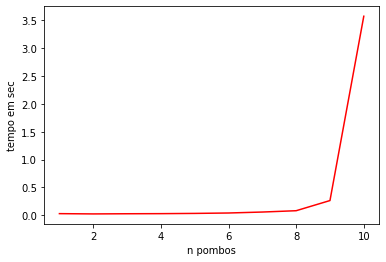

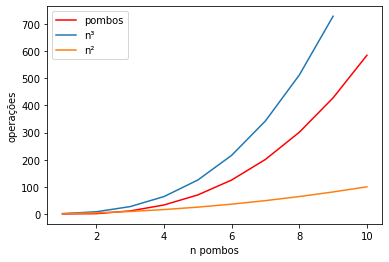

In [6]:
t1 = tempos (10,"pombos" )
n = range (1,11)
plt.plot(n, t1, 'r')
plt.xlabel('n pombos')
plt.ylabel('tempo em sec')
plt.show()



l = []
for i in range (10):
    l.append(pombos(i))

plt.plot(n, l,'r', label = "pombos")
plt.xlabel('n pombos')
plt.ylabel('operações')
graph('x**3', range(1, 10) , "n³")
graph('x**2', range(1, 11) , "n²")
plt.legend(loc="upper left")
plt.show()

<h4><b>II) Lógica Inteiro Linear</b></h4>
A função pombos_inteiro_linear , pelo método de lógica linear inteira tem complexidade assimptótica O(N²) , e tal como a função anterior, é possivel verificar com a contagem das operações e com as estimativas que efetuamos do possível número de operações.

<b> Melhor caso :</b>  n < 1 , n sendo número de pombos   O(1)

<b> Pior caso :</b>  n $\geq$ 1 , n sendo número de pombos     O(N²)

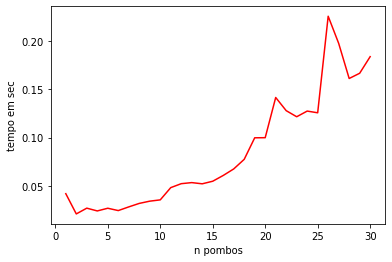

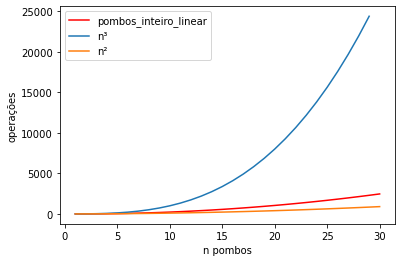

In [7]:
t2 = tempos (30,"pombos_inteiro_linear" )
n = range (1,31)
plt.plot(n, t2, 'r')
plt.xlabel('n pombos')
plt.ylabel('tempo em sec')
plt.show()




l = []
for i in range (30):
    l.append(pombos_inteiro_linear(i))

plt.plot(n, l,'r', label = "pombos_inteiro_linear")
plt.xlabel('n pombos')
plt.ylabel('operações')
graph('x**3', range(1, 30) , "n³")
graph('x**2', range(1, 31) , "n²")
plt.legend(loc="upper left")
plt.show()

<h4><b>III)Comparações</b></h4>

É possível perceber que a lógica inteira linear é a mais eficaz na resolução do problema “pigeon hole principle” (PHP), devido ao seu grau de complexidade ser bem menor que a lógica proposicional , executando em tempos muito inferiores do que a sua concorrente.

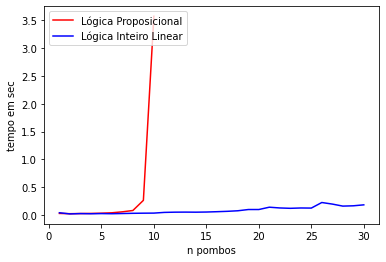

In [8]:
l = []
for i in range (20):
    t1.append(None)


plt.plot(n, t1, 'r', label = "Lógica Proposicional") 
plt.plot(n, t2, 'b', label = "Lógica Inteiro Linear") 
plt.legend(loc="upper left")
plt.xlabel('n pombos')
plt.ylabel('tempo em sec')
plt.show()



